<a href="https://colab.research.google.com/github/namwootree/Portfolio/blob/main/Competition/Kaggle/Scrabble%20Player%20Rating/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

## Library

In [22]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
import warnings
warnings.filterwarnings(action='ignore')

## Google Drive Mount

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip File

In [4]:
!unzip -qq '/content/drive/MyDrive/머신러닝 엔지니어링/Kaggle/Scrabble Player Rating/data/scrabble-player-rating.zip'

# Load Data

In [46]:
path_save = '/content/drive/MyDrive/머신러닝 엔지니어링/Kaggle/Scrabble Player Rating/submission/'

In [47]:
XGB = pd.read_csv(path_save + 'submission_optuna_XGB.csv')
LGBM = pd.read_csv(path_save + 'submission_optuna_LGBM.csv')
CAT = pd.read_csv(path_save + 'submission_optuna_CAT.csv')

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
test.dropna(inplace=True)
test = test.set_index("game_id")

In [48]:
test.head()

,nickname,score,rating
game_id,,,
2,BetterBot,401,2000.0
7,STEEBot,377,2082.0
11,STEEBot,334,1829.0
14,STEEBot,403,2136.0
27,HastyBot,453,2258.0


In [49]:
XGB.head()

,game_id,rating
0,2,1990.9109
1,7,1897.4026
2,11,1872.5504
3,14,1812.9038
4,27,2071.3423


In [50]:
LGBM.head()

,game_id,rating
0,2,1976.971409
1,7,1937.503328
2,11,1831.060307
3,14,1839.620779
4,27,2099.928414


In [51]:
CAT.head()

,game_id,rating
0,2,1966.435577
1,7,1869.961096
2,11,1819.405743
3,14,1807.394672
4,27,2036.691487


# Ensemble

In [63]:
# results = [np.array(XGB['rating']),
#            np.array(LGBM['rating']),
#            np.array(CAT['rating'])]

# final_preds = np.mean(results, axis=0)

results = [np.array(LGBM['rating'])*0.7,
          np.array(CAT['rating'])*0.2,
          np.array(XGB['rating'])*0.1]

final_preds = np.sum(results, axis=0)

Text(0.5, 1.0, 'Distribution of Predicted Ratings')

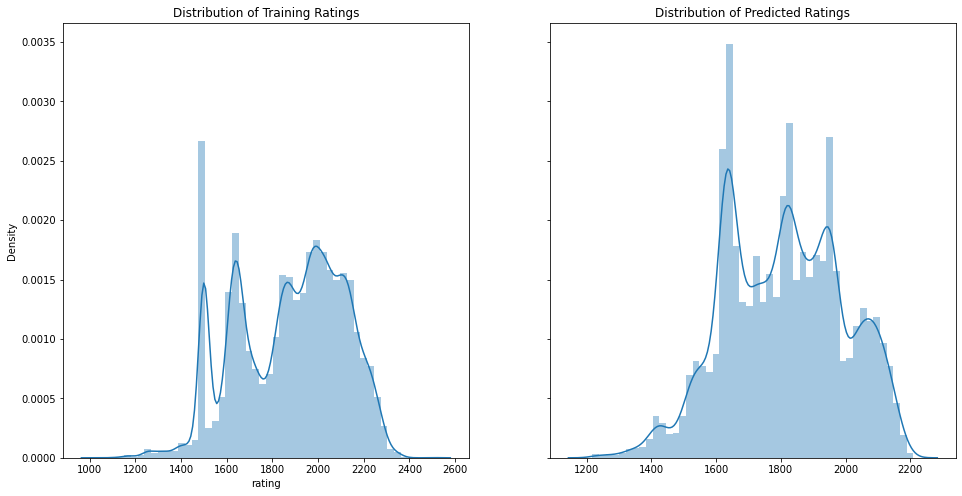

In [64]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16,8))
sns.distplot(train['rating'], ax=axs[0])
axs[0].set_title("Distribution of Training Ratings")
sns.distplot(final_preds , ax=axs[1])
axs[1].set_title("Distribution of Predicted Ratings")

In [61]:
test['rating'] = final_preds
submission = test['rating']

path_save = '/content/drive/MyDrive/머신러닝 엔지니어링/Kaggle/Scrabble Player Rating/submission/'
submission.to_csv(path_save + "submission_optuna_Ensemble1.csv")

In [62]:
submission

game_id
2        1985.675470
7        1902.678595
11       1858.937916
14       1817.696283
27       2073.594441
            ...     
72760    2102.915457
72761    1708.236865
72762    1519.598347
72768    2076.612186
72769    1861.618046
Name: rating, Length: 22363, dtype: float64